# Plot a Single Nonlinear Scan Data Set

This code computes the delays for the data and then plots those delays.  It's designed to start at a directory level and plot the data for all of the subdirectories.  It will figure out which delays were recorded, but don't give it a perfect badge for getting it right all of the time.

In [20]:
%run ComputeDelays.py  #load a whole bunch of (poorly commented) subroutines
#%matplotlib auto
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import math
import csv
import os
#font = {'family' : 'normal',
 #       'weight' : 'normal',
  #      'size'   : 16}

#plt.rc('font', **font)

In [7]:
'''
21/11/2022 - Declan Andrew
Checks a folder written by the oscillioscope in RunOneNonLinearExperiment.py
Looks for missing files using the delay range provided, checks for empty files.
Checks each file for NaNs. 'w' flag converts nans to zeros and rewrites.
Returns a list of indices for data processing and plotting to ignore.

folder/file format e.g. 'TS1/TS1_pp.csv'
path must be same path given to Compute_Filter_All_Delays
delayn = int 

TO DO: Use list for delayn
'''
prefixs = ['pu', 'pr', 'pp']
ftype = '.csv'

def checkExperiment(path:str, delayn:int, w=False):
    psplit = path.split('/')
    foldern = psplit[-1]
    path = '/'.join(psplit[:-1])
    files = os.listdir(path)
    #print(files)
    missing, empty, padded, idx_lost = [],[],[],[]
    for i in range(delayn):
        y_checks = []
        for pre in prefixs:
            #-------------------Check if file exists-------------------#
            #file = foldern + pre + str(i) + ftype
            file = pre + str(i) + ftype
            if file not in files:
                print(file+' missing!')
                missing.append(pre+str(i))
                idx_lost.append(i)
                continue
            #------------Look for empty files, read in data------------#
            try:
                data = pd.read_csv(path+'/'+file)
            except pd.errors.EmptyDataError:
                print('File {0}{1} empty!'.format(pre,i))
                empty.append(pre+str(i))
                idx_lost.append(i)
                continue
            time = data['x-axis'].tolist()[1:]
            volts = data['1'].tolist()[1:]
            y_checks.append(np.asarray(volts))
            #-------Check for NaNs, rewrite with zeros if flagged-------#
            if pd.isna(volts).any():
                padded.append(pre+str(i))
                idx_lost.append(i)
                if w: #Rewrite to file or not
                    volts = [float(x) for x in volts]
                    volts = [0 if math.isnan(z) else z for z in volts]
                    #print('File {0}{1} contains missing values. Zeros padded'.format(pre,i))
                    with open(path+'/'+file, 'w', newline='', encoding='utf-8') as f:
                        writer = csv.writer(f)
                        writer.writerow(['x-axis', '1'])    #Hard-coded for oscilloscope output format
                        writer.writerow(['second', 'Volt'])
                        writer.writerows(zip(time, volts))
                    f.close()
        #-------------------Check for duplicate arrays-----------------#
        for j in range(len(y_checks)-1):
            for k in range(j+1, len(y_checks)):
                if np.array_equal(y_checks[j], y_checks[k]):
                    idx_lost.append(i)
    
    idx_lost = list(set(idx_lost))
    print(len(empty), ' Files empty: ', empty)
    print(len(missing), ' Files do not exist: ', missing)
    print(len(padded), ' Files with missing data: ', padded)
    print('All delays to skip: ({0}): '.format(len(idx_lost)), idx_lost)
    return idx_lost

In [9]:
delayn=100
path1 = 'Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/2021-04-09/Trial1/10.0V'
#path1='/Users/labuser/Desktop/Declan_codes/TS1/TS1_'
#path2='/Users/labuser/Desktop/Declan_codes/TS2/TS2_'
#path3='/Users/labuser/Desktop/Declan_codes/TS3/TS3_'
lost1= checkExperiment(path1, delayn)
#lost2= checkExperiment(path2, delayn)
#lost3= checkExperiment(path3, delayn)
delayvec1 = np.asarray([i for i in range(delayn) if i not in lost1])
#delayvec2 = np.asarray([i for i in range(delayn) if i not in lost2])
#delayvec3 = np.asarray([i for i in range(delayn) if i not in lost3])

fname_part2=''
fnameend='.csv'
delay_scale_fact=1
missing_data=[]
delaystep=1.0
winlen=60e-6
recompute=1
flipdelays=0

tshifts1=Compute_Filter_All_Delays(delayvec1,delay_scale_fact,missing_data,delaystep,path1,fname_part2,fnameend,winlen,recompute,flipdelays=flipdelays)
#tshifts2=Compute_Filter_All_Delays(delayvec2,delay_scale_fact,missing_data,delaystep,path2,fname_part2,fnameend,winlen,recompute,flipdelays=flipdelays)
#tshifts3=Compute_Filter_All_Delays(delayvec3,delay_scale_fact,missing_data,delaystep,path3,fname_part2,fnameend,winlen,recompute,flipdelays=flipdelays)
 

pu0.csv missing!
pr0.csv missing!
pp0.csv missing!
pu1.csv missing!
pr1.csv missing!
pp1.csv missing!
pu2.csv missing!
pr2.csv missing!
pp2.csv missing!
pu3.csv missing!
pr3.csv missing!
pp3.csv missing!
pu4.csv missing!
pr4.csv missing!
pp4.csv missing!
pu5.csv missing!
pr5.csv missing!
pp5.csv missing!
pu6.csv missing!
pr6.csv missing!
pp6.csv missing!
pu7.csv missing!
pr7.csv missing!
pp7.csv missing!
pu8.csv missing!
pr8.csv missing!
pp8.csv missing!
pu9.csv missing!
pr9.csv missing!
pp9.csv missing!
pu10.csv missing!
pr10.csv missing!
pp10.csv missing!
pu11.csv missing!
pr11.csv missing!
pp11.csv missing!
pu12.csv missing!
pr12.csv missing!
pp12.csv missing!
pu13.csv missing!
pr13.csv missing!
pp13.csv missing!
pu14.csv missing!
pr14.csv missing!
pp14.csv missing!
pu15.csv missing!
pr15.csv missing!
pp15.csv missing!
pu16.csv missing!
pr16.csv missing!
pp16.csv missing!
pu17.csv missing!
pr17.csv missing!
pp17.csv missing!
pu18.csv missing!
pr18.csv missing!
pp18.csv missing!
pu19

In [6]:
%matplotlib widget
PUMPdat=timedata('PUMPDat')
readlabdat(path1+'SB4.csv',PUMPdat)
plt.plot(PUMPdat.time,PUMPdat.data)
#plt.plot(PUMPdat2.time,PUMPdat2.data)

ModuleNotFoundError: No module named 'ipympl'

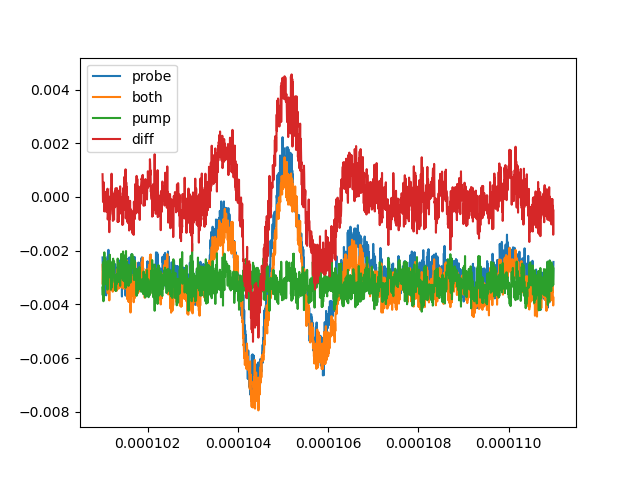

In [21]:
%matplotlib widget
delay = 50
path='TS3/TS3_'
prdat=timedata('prDat')
readlabdat(path+'pr{0}.csv'.format(delay),prdat)
plt.plot(prdat.time,prdat.data,label='probe')
ppdat=timedata('ppDat')
readlabdat(path+'pp{0}.csv'.format(delay),ppdat)
plt.plot(ppdat.time,ppdat.data,label='both')
pudat=timedata('puDat')
readlabdat(path+'pu{0}.csv'.format(delay),pudat)
plt.plot(pudat.time,pudat.data,label='pump')
plt.plot(prdat.time,ppdat.data-pudat.data,label='diff')
plt.legend()


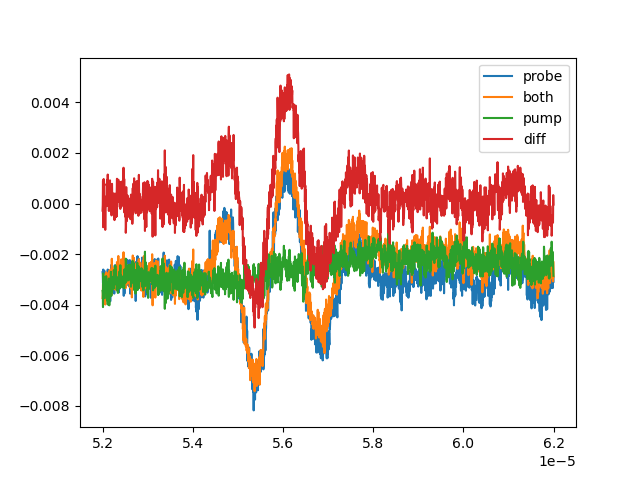

In [16]:
%matplotlib widget
path='TS3/TS3_'
delay = 1
prdat=timedata('prDat')
readlabdat(path+'pr{0}.csv'.format(delay),prdat)
plt.plot(prdat.time,prdat.data,label='probe')
ppdat=timedata('ppDat')
readlabdat(path+'pp{0}.csv'.format(delay),ppdat)
plt.plot(ppdat.time,ppdat.data,label='both')
pudat=timedata('puDat')
readlabdat(path+'pu{0}.csv'.format(delay),pudat)
plt.plot(pudat.time,pudat.data,label='pump')
plt.plot(prdat.time,ppdat.data-pudat.data,label='diff')
plt.legend()


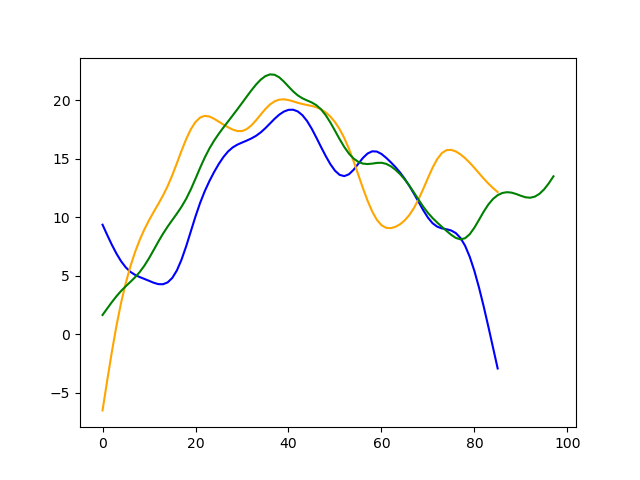

In [25]:
%matplotlib widget
plt.plot(tshifts1.remove_noise_wiggles, color='blue')
plt.plot(tshifts2.remove_noise_wiggles, color = 'orange')
plt.plot(tshifts3.remove_noise_wiggles, color='green')

In [9]:

def GetDelays(pathlist,maxvalpump,winlen=60e-6,savefig=0,pathbase='',compbase='',recompute=0,missing_data=np.array([]),delaystep=1.0,delay_scale_fact=1,doslopes=0,plotcolor='O'):
#This computes the delays and plots: (i) the delays for all of the data (ii) the delays as a function of input voltage (ii) the wiggle amplitude (which is actually the amplitude of a best-fit sinusoid) (iii) the delays as a function of the maximum recorded pump amplitude and (iv) the wiggle amplitude as a function of the maximum recorded pump amplitude.  
#It has limited capacity to fit some of these data to a line, but that's definitely not debugged.  Inputs are:
#pathlist: list of directory names that contain the .csv files (see description for plotPUMP
#maxvalpump: output from plotPUMP, which is the maximum value of the pump for each filename.  Should have the same dimensions of the pathlist
#winlen=60e-6: window over which the cross-correlation is computed
#savefig=0: =1 saves figures in the directory that the data are held in, as well as at levels up from there
#pathbase='': can be used so that the pathlist need not contain some root directory, so the code will look for files in pathbase+pathlist[ii]
#compbase='': used in the filenames of figures it outputs, so that you can say what two data sets are being compared in the output
#recompute=0: =1 will recompute the delays (e.g. to change the window length), and save them to disk (delays.txt) in the same directory as the data.  If this is set to 0 it will only compute the delays if it doesn't find the file delays.txt
#missing_data=np.array([]): if you put numbers in here it will skip those delays, useful if there are bad data points
#delaystep=1.0: step between subsequent delays
#delay_scale_fact=1: If you've named the files with some scaling factor so ppX.csv is for delay x/10 then set the scale factor to 10
#doslopes=0: =1 computes the slope of the maximum delay as a function of the input voltage or the maximum of the pump amplitude
#plotcolor='O': Sets how the color of the different lines in the plot are determined.  'V' uses the amplitude to set the color, otherwise it's orientaiton (I think) or random.  
#The labels in the legend are SxOyTzAw where x is the sample number, y is the orientation, z is the trial and w is the amplitude

   
    shiftslist=[]
    
#missing_data=np.array([])#12,21,22,25,26,29,43])

    ii=0
    for pathend in pathlist:
       
        ii=ii+1
        path=pathbase+pathend
        fname_part2=''
        fnameend='.csv'
        tshifts2=shifts('tshifts2')

        path_split=path.split('/')
        nlevels=len(path_split)
        delayflipstring=path_split[nlevels-4]
        if delayflipstring.count('PUMP') is 1:
            flipdelays=1
            print("delays have been flipped for"+path+pathend)

        else:
            flipdelays=0

        
        
        #figure out the delays that are recorded in the directory; note this doesn't check for missing files, just finds the range
        filelist=sorted(glob.glob(path+"pp*"),key=getnum)



        dvec=[]
        for fname in filelist:
            filesplit=fname.split('/')
            ndirs=len(filesplit)
            firstfilename2=filesplit[ndirs-1]
            ndig=len(firstfilename2)
            delay1=firstfilename2[2:ndig-4]
            dvec.append(float(delay1))

        delayvec=np.sort(dvec)

        
        #Compute the time delays
        tshifts2=Compute_Filter_All_Delays(delayvec,delay_scale_fact,missing_data,delaystep,path,fname_part2,fnameend,winlen,recompute,flipdelays=flipdelays)
        shiftslist.append(tshifts2)
        
        
        

    return shiftslist
    

<>:35: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:35: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/rq/jt3lntlx38dbl4xhpf5f8nlc0000gr/T/ipykernel_44386/3965476623.py:35: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if delayflipstring.count('PUMP') is 1:


In [ ]:
def MakePlots(plist, tlist,ampvec,figname_base,labelname,savefig=1 ):
    
    rawdelayfigname=figname_base+'.png'
    wigglesfigname=figname_base+'_wig.png'
    maxdelayfigname=figname_base+'_max.png'
    maxwigdelayfigname=figname_base+'_maxwig.png'
    
    
    #this loop sets up the path list itself
    for p in plist:
        for t1 in tlist:
            for a1 in ampvec:
                pathlist.append(p+t1+a1)


      #Set this to 1 if you want it to make figures and write them to disk in the same directory as the delays themselves
    recompute=0  #Set this to 1 if you want to recompute the delays
    #missing_data=np.array([43,55,68])  #use this to remove a few delays if they are funky
    missing_data=np.array([])#44,45,46,47,48,49,50])  #leave it like this if all data are OK
    maxvalpump=plotPUMP(pathbase,pathlist)  #this reads all of the PUMP (S-wave) data and computes the maximum values of the PUMP for each data set
    shiftslist=GetDelays(pathlist,maxvalpump,missing_data=missing_data,pathbase=pathbase,plotcolor='V',doslopes=0,savefig=savefig,recompute=recompute)  #This computes and plots the delays.  I will write documentation for this one and paste it in below
    plt.legend(loc=2)
    plt.xlim([25,100])
    #plt.show()
    
    font = {
        'weight' : 'bold',
        'size'   : 16}

    plt.rc('font', **font)

    plt.figure(figsize=[8,4])
    for shifts,p in zip(shiftslist,plist):
        plt0, =plt.plot(shifts.delays,shifts.raw,'^',label=p[0:-1])
        mycol=plt.getp(plt0,'color')
        plt.plot(shifts.delays,shifts.remove_noise,color=mycol)

    plt.title(labelname)
    plt.xlabel('transmission delay ($\mu s$)',fontsize=16)
    plt.ylabel('time delay (ns)',fontsize=14)
    plt.legend(loc=1)
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.savefig(rawdelayfigname,dpi=300)


    fig_wigs=plt.figure(figsize=[8,3])

    maxvalslist=[]
    maxwigslist=[]
    pvals=[]

    for shifts,p in zip(shiftslist,plist):
        plt.plot(shifts.delays,shifts.remove_noise_trend,label=p[0:-1])
        maxvalslist.append(np.max(shifts.remove_noise_wiggles))
        maxwigslist.append(np.max(shifts.remove_noise_trend))
        pvals.append(p[0:-4])


    plt.xlabel('transmission delay ($\mu s$)',fontsize=16,weight='bold')
    plt.ylabel('time delay (ns)',fontsize=16,weight='bold')
    plt.title(labelname,size=16,weight='bold')
    #plt.ylim([-4,4])
    plt.legend(loc=1)
    plt.gcf().subplots_adjust(bottom=0.2)

    plt.savefig(wigglesfigname,dpi=300)

    plt.figure(figsize=[8,3])
    plt.plot(pvals,maxvalslist)
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.xlabel('applied load (MPa)')
    plt.ylabel('maximum delay (ns)')
    plt.title(labelname)

    plt.savefig(maxdelayfigname,dpi=300)

    plt.figure(figsize=[8,3])
    plt.plot(pvals,maxwigslist)
    plt.xlabel('applied load (MPa)')
    plt.ylabel('maximum wiggle delay (ns)')
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.title(labelname)

    plt.savefig(maxwigfigname,dpi=300)

    return maxwigslist,maxvalslist,pvals


In [ ]:
def MakePlots_subs(pathbase,plist, tlist,ampvec,h1='None',h2='None',labelname=''):
    print(pathbase)
    print(tlist)
    myp=sns.color_palette("cubehelix")
    colors=[myp[0],myp[1],myp[2],myp[3],myp[4],myp[5]]



    if h1 is 'None':
        h1=plt.figure(figsize=[8,12])
    if h2 is 'None':
        h2=plt.figure()
    
    #this loop sets up the path list itself
    pathlist=[]
    for p in plist:
        for t1 in tlist:
            for a1 in ampvec:
                pathlist.append(p+t1+a1)

    
    shiftslist=GetDelays(pathlist,maxvalpump=np.zeros(len(pathlist)),pathbase=pathbase,plotcolor='V',doslopes=0)  #This computes and plots the delays.  I will write documentation for this one and paste it in below
    
    ii=0
    for shifts,p in zip(shiftslist,plist):
        mycol=colors[ii]
        ii=ii+1
        plt.sca(h1)
        plt0, =plt.plot(shifts.delays,shifts.raw,'^',color=mycol,label=p[0:-1])
#        mycol=plt.getp(plt0,'color')
        plt.plot(shifts.delays,shifts.remove_noise,color=mycol)

    plt.title(labelname,size=18,weight='bold')

    for shifts,p in zip(shiftslist,plist):
        plt.sca(h2)
        plt.plot(shifts.delays,shifts.remove_noise_trend,label=p[0:-1])


    plt.title(labelname,size=18,weight='bold')

    return 


This is an example where you set the paths up manually.  (From before I got tired of doing this and fixed it so that you could just do it without having to write it all out.)  It still uses a loop to go through and setup the final path.

In [ ]:
#Sample 2, P to S
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams.update({'font.weight': 'bold'})



pathbase1='/Users/amalcolm/Dropbox/Nonlinear/Experiments/Data_From_Lauren/PressData/Sample2/Fullscan/'  #start from this level of the path
pathbase2='/Users/amalcolm/Dropbox/Nonlinear/Experiments/Data_From_Lauren/PressData/Sample3/Fullscan/'  #start from this level of the path

baselist=[pathbase1,pathbase2]

plist=['1MPa/','2MPa/','5MPa/','10MPa/','15MPa/']#,'18MPa/']#,'Jun1/Nonlinear_FIR/']

tlist1=['PtoS/Trial1/']  #it will look at both trials in each path
tlist2=['StoS/Trial1/']

tlist_list=[tlist1,tlist2]

ampvec=['10.0V/'] # and all 5 amplitudes
pathlist=[]  #empty the path list, so that you can run the cell multiple times without getting bogged down in it.


labellist1=['Sample 1 ','Sample 2 ']
labellist2=['P probe ','S probe ']

myfig1=plt.figure(figsize=[16,9])
myfig2=plt.figure(figsize=[16,9])



ii=1
for pathbase,labelname1 in zip(baselist,labellist1):
    for tlist,labelname2 in zip(tlist_list,labellist2):

        labelname=labelname1+labelname2
        
        plt.figure(myfig1.number)
        h1=plt.subplot(2,2,ii)

        plt.figure(myfig2.number)
        h2=plt.subplot(2,2,ii)
        

        if ii is 4:
            plist.append('18MPa/')
        
        MakePlots_subs(pathbase, plist, tlist,ampvec,h1,h2,labelname=labelname)
        ii=ii+1
        

        

plt.figure(myfig1.number)
plt.subplot(2,2,4)
lg=plt.legend(ncol=1,bbox_to_anchor=(1.01, 0.75))
#plt.ylim([-10,35])
plt.subplot(2,2,1)

frame=plt.gca()
frame.axes.get_xaxis().set_visible(False)
plt.subplot(2,2,2)
frame=plt.gca()
frame.axes.get_xaxis().set_visible(False)
yval=plt.gca().get_ylim()
print(yval)
plt.text(-2,-10,'(c)')
plt.gca().set_ylim(yval)


#mytxt1=myfig1.text(-0.01, 0.52, 'Time Delay (ns)', va='center',rotation='vertical',size=18,weight='bold')
#mytxt2=myfig1.text(0.5, -0.04, 'Transmission Delay ($\mu$s)', ha='center',size=16)
plt.subplot(2,2,1)
plt.ylabel('Time Delay (ns)',size=18,weight='bold')
yval=plt.gca().get_ylim()
print(yval)
plt.text(-2,-10,'(b)')
plt.gca().set_ylim(yval)


plt.subplot(2,2,3)
plt.ylabel('Time Delay (ns)',size=18,weight='bold')
yval=plt.gca().get_ylim()
print(yval)
plt.text(-2,-10,'(3)')
plt.gca().set_ylim(yval)


plt.xlabel('Transmission Delay ($\mu$s)',size=18,weight='bold')
plt.subplot(2,2,4)
plt.xlabel('Transmission Delay ($\mu$s)',size=18,weight='bold')

yval=plt.gca().get_ylim()
print(yval)
plt.text(-2,-10,'(e)')
plt.gca().set_ylim(yval)

plt.tight_layout()

#plt.savefig('/Users/amalcolm/Dropbox/Nonlinear/MyCracksPaper/Figures/AllData.png',bbox_extra_artists=(lg,mytxt1))#,mytxt2), bbox_inches='tight')

#plt.figure(myfig2.number)
#plt.subplot(2,2,1)
##frame=plt.gca()
#frame.axes.get_xaxis().set_visible(False)
#plt.subplot(2,2,2)
#frame=plt.gca()
#frame.axes.get_xaxis().set_visible(False)
#plt.subplot(2,2,3)
#plt.legend(ncol=2)



#mytxt1=myfig2.text(-0.01, 0.52, 'Time Delay (ns)', va='center',rotation='vertical',size=18,weight='bold')
#mytxt2=myfig2.text(0.5, -0.04, 'Transmission Delay ($\mu$s)', ha='center',size=18,weight='bold')
#plt.tight_layout()

#plt.savefig('AllData_Wigs.png',bbox_extra_artists=(mytxt1,mytxt2), bbox_inches='tight')


plt.show()

In [ ]:
#Sample 2, P to S
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams.update({'font.weight': 'bold'})



pathbase1='/Users/amalcolm/Dropbox/Nonlinear/Experiments/Data_From_Lauren/PressData/Sample2/Fullscan/'  #start from this level of the path
pathbase2='/Users/amalcolm/Dropbox/Nonlinear/Experiments/Data_From_Lauren/PressData/Sample3/Fullscan/'  #start from this level of the path

baselist=[pathbase2,pathbase1]

plist=['1MPa/','2MPa/','5MPa/','10MPa/','15MPa/']#,'18MPa/']#,'Jun1/Nonlinear_FIR/']

tlist1=['PtoS/Trial1/']  #it will look at both trials in each path
tlist2=['StoS/Trial1/']

tlist_list=[tlist1]#,tlist2]

ampvec=['10.0V/'] # and all 5 amplitudes
pathlist=[]  #empty the path list, so that you can run the cell multiple times without getting bogged down in it.


labellist1=['Sample 1 ','Sample 2 ']
labellist2=['P probe ','S probe ']

myfig1=plt.figure(figsize=[16,9])
myfig2=plt.figure(figsize=[16,9])



ii=1
for pathbase,labelname1 in zip(baselist,labellist1):
    for tlist,labelname2 in zip(tlist_list,labellist2):

        labelname=labelname1+labelname2
        
        plt.figure(myfig1.number)
        h1=plt.subplot(2,2,ii)

        plt.figure(myfig2.number)
        h2=plt.subplot(2,2,ii)
        

        if ii is 4:
            plist.append('18MPa/')
        
        MakePlots_subs(pathbase, plist, tlist,ampvec,h1,h2,labelname=labelname)
        ii=ii+1
        

        

plt.figure(myfig1.number)
lg=plt.legend(ncol=1,bbox_to_anchor=(1.01, 0.75))
#plt.ylim([-10,35])
plt.subplot(2,2,1)
plt.title("Orientation 1",size=18, weight='bold')
plt.ylabel('Time Delay (ns)',size=18,weight='bold')
yval=plt.gca().get_ylim()
print(yval)
plt.gca().set_ylim([-5,60])

plt.xlabel('Transmission Delay ($\mu$s)',size=18,weight='bold')

plt.subplot(2,2,2)
plt.title("Orientation 2",size=18, weight='bold')
plt.gca().set_ylim([-5,60])
plt.xlabel('Transmission Delay ($\mu$s)',size=18,weight='bold')



plt.tight_layout()

plt.savefig('/Users/amalcolm/Dropbox/Nonlinear/MyCracksPaper/Figures/AllData_slide.png',bbox_extra_artists=(lg))#,mytxt2), bbox_inches='tight')

#plt.figure(myfig2.number)
#plt.subplot(2,2,1)
##frame=plt.gca()
#frame.axes.get_xaxis().set_visible(False)
#plt.subplot(2,2,2)
#frame=plt.gca()
#frame.axes.get_xaxis().set_visible(False)
#plt.subplot(2,2,3)
#plt.legend(ncol=2)



#mytxt1=myfig2.text(-0.01, 0.52, 'Time Delay (ns)', va='center',rotation='vertical',size=18,weight='bold')
#mytxt2=myfig2.text(0.5, -0.04, 'Transmission Delay ($\mu$s)', ha='center',size=18,weight='bold')
#plt.tight_layout()

#plt.savefig('AllData_Wigs.png',bbox_extra_artists=(mytxt1,mytxt2), bbox_inches='tight')


plt.show()

In [ ]:
#Sample 2, P to S
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams.update({'font.weight': 'bold'})



pathbase1='/Users/amalcolm/Dropbox/Nonlinear/Experiments/Data_From_Lauren/PressData/Sample2/Fullscan/'  #start from this level of the path
pathbase2='/Users/amalcolm/Dropbox/Nonlinear/Experiments/Data_From_Lauren/PressData/Sample3/Fullscan/'  #start from this level of the path

baselist=[pathbase1,pathbase2]

plist=['1MPa/','2MPa/','5MPa/','10MPa/','15MPa/']#,'18MPa/']#,'Jun1/Nonlinear_FIR/']

tlist1=['PtoS/Trial1/']  #it will look at both trials in each path
tlist2=['StoS/Trial1/']

tlist_list=[tlist1,tlist2]

ampvec=['10.0V/'] # and all 5 amplitudes
pathlist=[]  #empty the path list, so that you can run the cell multiple times without getting bogged down in it.


labellist1=['Sample 1 ','Sample 2 ']
labellist2=['P probe ','S probe ']

myfig1=plt.figure(figsize=[16,12])
myfig2=plt.figure(figsize=[16,12])



ii=1
for pathbase,labelname1 in zip(baselist,labellist1):
    for tlist,labelname2 in zip(tlist_list,labellist2):

        labelname=labelname1+labelname2
        
        plt.figure(myfig1.number)
        h1=plt.subplot(2,2,ii)

        plt.figure(myfig2.number)
        h2=plt.subplot(2,2,ii)
        

        if ii is 4:
            plist.append('18MPa/')
        
        MakePlots_subs(pathbase, plist, tlist,ampvec,h1,h2,labelname=labelname)
        ii=ii+1
        

        

plt.figure(myfig1.number)
plt.subplot(2,2,4)
lg=plt.legend(ncol=1,bbox_to_anchor=(1.01, 0.75))
#plt.ylim([-10,35])
plt.subplot(2,2,1)

frame=plt.gca()
#frame.axes.get_xaxis().set_visible(False)
plt.subplot(2,2,2)
plt.xlabel('Transmission Delay ($\mu$s)',size=18,weight='bold')
plt.ylabel('Time Delay (ns)',size=18,weight='bold')



frame=plt.gca()
#frame.axes.get_xaxis().set_visible(False)
yval=plt.gca().get_ylim()
ypos=yval[0]-yrange/3-4
plt.text(-2,ypos,'(b)')

plt.gca().set_ylim(yval)


#mytxt1=myfig1.text(-0.01, 0.52, 'Time Delay (ns)', va='center',rotation='vertical',size=18,weight='bold')
#mytxt2=myfig1.text(0.5, -0.04, 'Transmission Delay ($\mu$s)', ha='center',size=16)
plt.subplot(2,2,1)
plt.xlabel('Transmission Delay ($\mu$s)',size=18,weight='bold')

plt.ylabel('Time Delay (ns)',size=18,weight='bold')
yval=plt.gca().get_ylim()
yrange=yval[1]-yval[0]
ypos=yval[0]-yrange/3
plt.text(-2,ypos,'(a)')
plt.gca().set_ylim(yval)


plt.subplot(2,2,3)
plt.ylabel('Time Delay (ns)',size=18,weight='bold')
yval=plt.gca().get_ylim()
print(yval)
ypos=yval[0]-yrange/3+8
plt.text(-2,ypos,'(c)')

plt.gca().set_ylim(yval)


plt.xlabel('Transmission Delay ($\mu$s)',size=18,weight='bold')
plt.subplot(2,2,4)
plt.xlabel('Transmission Delay ($\mu$s)',size=18,weight='bold')
plt.ylabel('Time Delay (ns)',size=18,weight='bold')


yval=plt.gca().get_ylim()
print(yval)
ypos=yval[0]-yrange/3+8
plt.text(-2,ypos,'(d)')

plt.gca().set_ylim(yval)

plt.tight_layout()

plt.savefig('/Users/amalcolm/Dropbox/Nonlinear/MyCracksPaper/Figures/AllData.png')#,bbox_extra_artists=(lg,mytxt1))#,mytxt2), bbox_inches='tight')


plt.show()

In [ ]:
figpath='/Users/amalcolm/Dropbox/Nonlinear/Experiments/Data_From_Lauren/AlisonFigs/'
maxfig=plt.figure(figsize=[8,3])
wigmaxfig=plt.figure(figsize=[8,3])
maxwigfigname='test.png'

In [ ]:
#Sample 2, P to S

pathbase='/Users/amalcolm/Dropbox/Nonlinear/Experiments/Data_From_Lauren/PressData/Sample2/Fullscan/'  #start from this level of the path
plist=['1MPa/','2MPa/','5MPa/','10MPa/','15MPa/']#,'18MPa/']#,'Jun1/Nonlinear_FIR/']
tlist=['PtoS/Trial1/']  #it will look at both trials in each path
ampvec=['10.0V/'] # and all 5 amplitudes
pathlist=[]  #empty the path list, so that you can run the cell multiple times without getting bogged down in it.

figname_base=figpath+'Sample2_PtoS'
labelname='Sample 1 P to S'


maxwigslist_2_PS, maxvalslist_2_PS, pvals_2_PS=MakePlots(plist, tlist,ampvec,figname_base,labelname)
plist_2_PS=list(plist)

In [ ]:
#Sample 2, S to S

pathbase='/Users/amalcolm/Dropbox/Nonlinear/Experiments/Data_From_Lauren/PressData/Sample2/Fullscan/'  #start from this level of the path
plist=['1MPa/','2MPa/','5MPa/','10MPa/','15MPa/']#,'18MPa/']#,'Jun1/Nonlinear_FIR/']
tlist=['StoS/Trial1/']  #it will look at both trials in each path
ampvec=['10.0V/'] # and all 5 amplitudes
pathlist=[]  #empty the path list, so that you can run the cell multiple times without getting bogged down in it.

figname_base=figpath+'Sample2_StoS'
labelname='Sample 1 S to S'

maxwigslist_2_SS, maxvalslist_2_SS,pvals_2_SS=MakePlots(plist, tlist,ampvec,figname_base,labelname)
plist_2_SS=list(plist)

In [ ]:
#Sample 3, S to S

pathbase='/Users/amalcolm/Dropbox/Nonlinear/Experiments/Data_From_Lauren/PressData/Sample3/Fullscan/'  #start from this level of the path
plist=['1MPa/','2MPa/','5MPa/','10MPa/','15MPa/','18MPa/']#,'Jun1/Nonlinear_FIR/']
tlist=['StoS/Trial1/']  #it will look at both trials in each path
ampvec=['10.0V/'] # and all 5 amplitudes
pathlist=[]  #empty the path list, so that you can run the cell multiple times without getting bogged down in it.

figname_base=figpath+'Sample3_StoS'
labelname='Sample 2 S to S'
maxwigslist_3_SS, maxvalslist_3_SS,pvals_3_SS=MakePlots(plist, tlist,ampvec,figname_base,labelname)
plist_3_SS=list(plist)

In [ ]:
#Sample 3, P to S

pathbase='/Users/amalcolm/Dropbox/Nonlinear/Experiments/Data_From_Lauren/PressData/Sample3/Fullscan/'  #start from this level of the path
plist=['1MPa/','2MPa/','5MPa/','10MPa/','15MPa/']#,'18MPa/']#,'Jun1/Nonlinear_FIR/']
tlist=['PtoS/Trial1/']  #it will look at both trials in each path
ampvec=['10.0V/'] # and all 5 amplitudes
pathlist=[]  #empty the path list, so that you can run the cell multiple times without getting bogged down in it.

figname_base=figpath+'Sample3_PtoS'
labelname='Sample 2 P to S'
maxwigslist_3_PS, maxvalslist_3_PS,pvals_3_PS=MakePlots(plist, tlist,ampvec,figname_base,labelname)
plist_3_PS=list(plist)

In [ ]:
#maxwigslist_3_PS, maxvalslist_3_PS=MakePlots(plist, tlist,ampvec,figname_base,labelname)
#plist_3_PS=list(plist)
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams.update({'font.weight': 'bold'})


myfig=plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.plot(pvals_2_PS,maxvalslist_2_PS,'b--^',label='Sample 1 P probe')
plt.plot(pvals_2_SS,maxvalslist_2_SS,'r--^',label='Sample 1 S probe')
plt.plot(pvals_3_PS,maxvalslist_3_PS,'b-o',label='Sample 2 P probe')
plt.plot(pvals_3_SS,maxvalslist_3_SS,'r-o',label='Sample 2 S probe')
plt.ylabel('Maximum Delay (ns)',weight='bold',size=18)
plt.title('Maximum Time Delay',weight='bold',size=18)
plt.xlabel('Applied Load (MPa)',weight='bold',size=18)
plt.ylim([0,80])

#plt.xticks([2,4,6,8,10,12,14,16,18])
#plt.xlim([0,20])


leg=plt.legend(fontsize=16)
yvals=plt.gca().get_ylim()
plt.text(-.5,-15,'(a)')
plt.gca().set_ylim(yvals)


plt.subplot(1,2,2)
plt.plot(pvals_2_PS,maxwigslist_2_PS,'b--^',label='Sample 1 P to S')
plt.plot(pvals_2_SS,maxwigslist_2_SS,'r--^',label='Sample 1 S to S')
plt.plot(pvals_3_PS,maxwigslist_3_PS,'b-o',label='Sample 2 P to S')
plt.plot(pvals_3_SS,maxwigslist_3_SS,'r-o',label='Sample 2 S to S')
plt.ylabel('Maximum Delay (ns)',weight='bold',size=18)
plt.title('Maximum Time Delay at 90 kHz',weight='bold',size=18)
plt.xlabel('Applied Load (MPa)',weight='bold',size=18)
yvals=plt.gca().get_ylim()
plt.text(-.5,-.55,'(b)')
plt.gca().set_ylim(yvals)

#plt.xticks([2,4,6,8,10,12,14,16,18])
#plt.xlim([0,20])

#mytxt2=myfig.text(0.5, -0.04, 'Applied Load (MPa)', ha='center',size=16)
plt.tight_layout()

plt.savefig('/Users/amalcolm/Dropbox/Nonlinear/MyCracksPaper/Figures/AllData_PeaksWigs.png', bbox_inches='tight',dpi=300)



plt.show()

In [ ]:
plt.figure(maxfig.number)
plt.gcf().subplots_adjust(bottom=0.2)
plt.xlabel('Pressure (MPa)')
plt.ylabel('Maximum Delay (ns)')
plt.legend()

plt.savefig(figpath+'maxfig_all.png',dpi=300)

plt.figure(wigmaxfig.number)
plt.gcf().subplots_adjust(bottom=0.2)
plt.xlabel('Pressure (MPa)')
plt.ylabel('Maximum Delay (ns)')
plt.legend()

plt.savefig(figpath+'maxwigfig_all.png',dpi=300)

plt.show()

In [ ]:
plt.figure()
plt.plot(shiftslist[0].delays,shiftslist[0].remove_noise_trend,'k',label='high-f signal')
plt.title('filtered data')
plt.xlabel('phase delay ($\mu s$)')
plt.ylabel('time delay (ns)')
plt.legend()
plt.show()

In [ ]:
maxvalslist=[]
for ii in range(len(shiftslist)):
    maxvalslist.append(np.max(shiftslist[ii].remove_noise))

plt.plot(maxvalslist)
plt.title('maximum values')
plt.ylabel('max delay (ns)')
plt.xlabel('data set number')

In [ ]:
maxvalslist=[]
for ii in range(len(shiftslist)):
    maxwigslist.append(np.max(shiftslist[ii].remove_noise_trend))

plt.plot(maxwigslist)
plt.title('maximum high-f values')
plt.ylabel('max high-f amplitude (ns)')
plt.xlabel('data set number')

In [ ]:
 #Compute the time delays
tshifts2=Compute_Filter_All_Delays(delayvec,delay_scale_fact,missing_data,delaystep,path,fname_part2,fnameend,winlen,recompute,flipdelays=flipdelays)


In [ ]:
print plist

In [ ]:
varname='hi'
exec(varname+'=5')
print hi

In [ ]:
plist_PS=list(plist)

In [ ]:
print plist
plist[0]='b'
print plist_PS

In [ ]:
pathbase='/Users/amalcolm/Dropbox/Nonlinear/Experiments/Data_From_Jacob/Humidity/'  #start from this level of the path
plist=['COS_1_01/','COS_1_02/','COS_4_SA_01/','COS_4_SA_02/']#,'18MPa/']#,'Jun1/Nonlinear_FIR/']
tlist=['Trial1/']  #it will look at both trials in each path
ampvec=['10.0V/'] # and all 5 amplitudes
pathlist=[]  #empty the path list, so that you can run the cell multiple times without getting bogged down in it.

figname_base=figpath+'Jacob'
labelname='Sample 2 P to S'
maxwigslist_3_PS, maxvalslist_3_PS,pvals_3_PS=MakePlots(plist, tlist,ampvec,figname_base,labelname)
plist_3_PS=list(plist)

In [ ]:
dat=np.loadtxt('/Users/amalcolm/Google Drive/Results_Somayeh/Humidity_Stability/Table0.txt')

In [ ]:
print np.shape(dat)

In [ ]:
from matplotlib import colors
import matplotlib as mpl

fig, ax1 = plt.subplots(figsize=(6, 6))
ax1=plt.subplot(2,1,1)
ax=plt.subplot(2,1,2)

cdict = {'red':   ((0.0,  0.22, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  0.89, 1.0)),

         'green': ((0.0,  0.49, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  0.12, 1.0)),

         'blue':  ((0.0,  0.72, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  0.11, 1.0))}

cmap = colors.LinearSegmentedColormap('custom', cdict)

#for i in np.linspace(0, 1):
    # Plot 50 lines, from y = 0 to y = 1, taking a corresponding value from the cmap
#    ax.plot([-1, 1], [i, i], c=cmap(i))

skip=6
start=4
ii=start
jjmax=66/skip-start
#
#fig, ax = plt.subplots(figsize=(6, 1))


for jj in range(jjmax):
    ax1.plot(dat[:,ii],dat[:,ii+1],c=cmap(float(jj)/float(jjmax)))
    ii=ii+skip

plt.colorbar(cmap=cmap)
#plt.colorbar(cmap)#ticks=[],label='time in box')
plt.show()

In [ ]:
print(np.shape(np.linspace(0,1)))

In [ ]:

from matplotlib.collections import LineCollection
N = 50
x = np.arange(N)
# Here are many sets of y to plot vs x
ys = [x + i for i in x]

# We need to set the plot limits, they will not autoscale
fig, ax = plt.subplots()
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(ys), np.max(ys))

# colors is sequence of rgba tuples
# linestyle is a string or dash tuple. Legal string values are
#          solid|dashed|dashdot|dotted.  The dash tuple is (offset, onoffseq)
#          where onoffseq is an even length tuple of on and off ink in points.
#          If linestyle is omitted, 'solid' is used
# See :class:`matplotlib.collections.LineCollection` for more information

# Make a sequence of x,y pairs
line_segments = LineCollection([np.column_stack([x, y]) for y in ys],
                               linewidths=(0.5, 1, 1.5, 2),
                               linestyles='solid')
line_segments.set_array(x)
ax.add_collection(line_segments)
axcb = fig.colorbar(line_segments)
axcb.set_label('Line Number')
ax.set_title('Line Collection with mapped colors')
plt.sci(line_segments)  # This allows interactive changing of the colormap.
plt.show()

In [ ]:

def GetDelays_NOPUMP(pathlist,winlen=60e-6,savefig=0,pathbase='',compbase='',recompute=0,missing_data=np.array([]),delaystep=1.0,delay_scale_fact=1,doslopes=0,plotcolor='O'):
#This computes the delays and plots: (i) the delays for all of the data (ii) the delays as a function of input voltage (ii) the wiggle amplitude (which is actually the amplitude of a best-fit sinusoid) (iii) the delays as a function of the maximum recorded pump amplitude and (iv) the wiggle amplitude as a function of the maximum recorded pump amplitude.  
#It has limited capacity to fit some of these data to a line, but that's definitely not debugged.  Inputs are:
#pathlist: list of directory names that contain the .csv files (see description for plotPUMP
#maxvalpump: output from plotPUMP, which is the maximum value of the pump for each filename.  Should have the same dimensions of the pathlist
#winlen=60e-6: window over which the cross-correlation is computed
#savefig=0: =1 saves figures in the directory that the data are held in, as well as at levels up from there
#pathbase='': can be used so that the pathlist need not contain some root directory, so the code will look for files in pathbase+pathlist[ii]
#compbase='': used in the filenames of figures it outputs, so that you can say what two data sets are being compared in the output
#recompute=0: =1 will recompute the delays (e.g. to change the window length), and save them to disk (delays.txt) in the same directory as the data.  If this is set to 0 it will only compute the delays if it doesn't find the file delays.txt
#missing_data=np.array([]): if you put numbers in here it will skip those delays, useful if there are bad data points
#delaystep=1.0: step between subsequent delays
#delay_scale_fact=1: If you've named the files with some scaling factor so ppX.csv is for delay x/10 then set the scale factor to 10
#doslopes=0: =1 computes the slope of the maximum delay as a function of the input voltage or the maximum of the pump amplitude
#plotcolor='O': Sets how the color of the different lines in the plot are determined.  'V' uses the amplitude to set the color, otherwise it's orientaiton (I think) or random.  
#The labels in the legend are SxOyTzAw where x is the sample number, y is the orientation, z is the trial and w is the amplitude

   
    shiftslist=[]
    
#missing_data=np.array([])#12,21,22,25,26,29,43])

    ii=0
    for pathend in pathlist:
       
        ii=ii+1
        path=pathbase+pathend
        fname_part2=''
        fnameend='.csv'
        tshifts2=shifts('tshifts2')

        path_split=path.split('/')
        nlevels=len(path_split)
        delayflipstring=path_split[nlevels-4]
        if delayflipstring.count('PUMP') is 1:
            flipdelays=1
            print("delays have been flipped for"+path+pathend)

        else:
            flipdelays=0

        
        
        #figure out the delays that are recorded in the directory; note this doesn't check for missing files, just finds the range
        filelist=sorted(glob.glob(path+"pp*"),key=getnum)



        dvec=[]
        for fname in filelist:
            filesplit=fname.split('/')
            ndirs=len(filesplit)
            firstfilename2=filesplit[ndirs-1]
            ndig=len(firstfilename2)
            delay1=firstfilename2[2:ndig-4]
            dvec.append(float(delay1))

        delayvec=np.sort(dvec)

        
        #Compute the time delays
        tshifts2=Compute_Filter_All_Delays_NOPUMP(delayvec,delay_scale_fact,missing_data,
                                                  delaystep,path,fname_part2,fnameend,winlen,
                                                  recompute,flipdelays=flipdelays)
        shiftslist.append(tshifts2)
        
        
        

    return shiftslist
    

In [ ]:

def GetDelays2(pathlist,winlen=60e-6,savefig=0,pathbase='',compbase='',recompute=0,missing_data=np.array([]),delaystep=1.0,delay_scale_fact=1,doslopes=0,plotcolor='O'):
#This computes the delays and plots: (i) the delays for all of the data (ii) the delays as a function of input voltage (ii) the wiggle amplitude (which is actually the amplitude of a best-fit sinusoid) (iii) the delays as a function of the maximum recorded pump amplitude and (iv) the wiggle amplitude as a function of the maximum recorded pump amplitude.  
#It has limited capacity to fit some of these data to a line, but that's definitely not debugged.  Inputs are:
#pathlist: list of directory names that contain the .csv files (see description for plotPUMP
#maxvalpump: output from plotPUMP, which is the maximum value of the pump for each filename.  Should have the same dimensions of the pathlist
#winlen=60e-6: window over which the cross-correlation is computed
#savefig=0: =1 saves figures in the directory that the data are held in, as well as at levels up from there
#pathbase='': can be used so that the pathlist need not contain some root directory, so the code will look for files in pathbase+pathlist[ii]
#compbase='': used in the filenames of figures it outputs, so that you can say what two data sets are being compared in the output
#recompute=0: =1 will recompute the delays (e.g. to change the window length), and save them to disk (delays.txt) in the same directory as the data.  If this is set to 0 it will only compute the delays if it doesn't find the file delays.txt
#missing_data=np.array([]): if you put numbers in here it will skip those delays, useful if there are bad data points
#delaystep=1.0: step between subsequent delays
#delay_scale_fact=1: If you've named the files with some scaling factor so ppX.csv is for delay x/10 then set the scale factor to 10
#doslopes=0: =1 computes the slope of the maximum delay as a function of the input voltage or the maximum of the pump amplitude
#plotcolor='O': Sets how the color of the different lines in the plot are determined.  'V' uses the amplitude to set the color, otherwise it's orientaiton (I think) or random.  
#The labels in the legend are SxOyTzAw where x is the sample number, y is the orientation, z is the trial and w is the amplitude

   
    shiftslist=[]
    
#missing_data=np.array([])#12,21,22,25,26,29,43])

    ii=0
    for pathend in pathlist:
       
        ii=ii+1
        path=pathbase+pathend
        fname_part2=''
        fnameend='.csv'
        tshifts2=shifts('tshifts2')

        path_split=path.split('/')
        nlevels=len(path_split)
        delayflipstring=path_split[nlevels-4]
        if delayflipstring.count('PUMP') is 1:
            flipdelays=1
            print("delays have been flipped for"+path+pathend)

        else:
            flipdelays=0

        
        
        #figure out the delays that are recorded in the directory; note this doesn't check for missing files, just finds the range
        filelist=sorted(glob.glob(path+"pp*"),key=getnum)



        dvec=[]
        for fname in filelist:
            filesplit=fname.split('/')
            ndirs=len(filesplit)
            firstfilename2=filesplit[ndirs-1]
            ndig=len(firstfilename2)
            delay1=firstfilename2[2:ndig-4]
            dvec.append(float(delay1))

        delayvec=np.sort(dvec)

        
        #Compute the time delays
        tshifts2=Compute_Filter_All_Delays(delayvec,delay_scale_fact,missing_data,delaystep,path,fname_part2,fnameend,winlen,recompute,flipdelays=flipdelays)
        shiftslist.append(tshifts2)
        
        
        

    return shiftslist
    

In [ ]:

def Compute_Filter_All_Delays(delayvec,delay_scale_fact,missing_data,delaystep,path,fname_part2,fnameend,winlen,recompute,flipdelays=0,outlier_thresh=1000.0):

    plt.figure()
    delayfname=path+'Delays.txt'


    if recompute==0:
        if os.path.isfile(delayfname):
            dat=np.genfromtxt(delayfname)
            tshifts=shifts('tshifts')
            tshifts.raw=dat[:,1]
            tshifts.remove_noise=dat[:,2]
            tshifts.remove_noise_trend=dat[:,3]
            tshifts.remove_noise_wiggles=dat[:,4]
            tshifts.delays=dat[:,0]
            return tshifts

    if np.size(missing_data)!=0:
        missing_data_index=(missing_data-delayvec[0])/delaystep
        delayvec=np.delete(delayvec,missing_data_index)
#    print delayvec



    activechannels=[1]
    activechannelnames=[]
    for k in activechannels:
        activechannelnames.append('ch'+str(k))
    
    probe_only=[timedata(ch) for ch in activechannelnames]
    PUMP_only=[timedata(ch) for ch in activechannelnames]
    PUMP_probe=[timedata(ch) for ch in activechannelnames]

    j=0
    tshift=np.empty(np.shape(delayvec)[0],'float')
    interp_ind=[]

    for delay in delayvec:
        fname_pump=path+'pu'+fname_part2+str(int(delay*delay_scale_fact))+fnameend
        fname_probe=path+'pr'+fname_part2+str(int(delay*delay_scale_fact))+fnameend
        fname_both=path+'pp'+fname_part2+str(int(delay*delay_scale_fact))+fnameend
        i=0
        for ch in activechannels:
            readlabdat(fname_both,PUMP_probe[i])
            readlabdat(fname_probe,probe_only[i])
            readlabdat(fname_pump,PUMP_only[i])
            i=i+1
        tshift[j]=Compute_single_delay(PUMP_probe,probe_only,PUMP_only,1,winlen)
        if np.abs(tshift[j]*1.0e9)>outlier_thresh:
            print("found outlier at "+str(delay)+", interpolating")
            interp_ind.append(j)
        elif interp_ind:
            interp_start=interp_ind[0]-1
            interp_end=j
            tshift[interp_ind]=np.interp(interp_ind,[interp_start,interp_end],[tshift[interp_start],tshift[interp_end]])
            interp_ind=[]
        
        if delay==delayvec[-1]:
            plt.plot(probe_only[i-1].data,label='probe only')
            plt.plot(PUMP_probe[i-1].data,label='perturbed probe')
            plt.legend()

        
        j=j+1

    fs=1.0/(delaystep*1.0e-6)

    tshifts=shifts('tshifts')
    tshifts.raw=-tshift*1.0e9
#    tshifts.remove_noise=butter_lowpass_filter(tshifts.raw,150.e3,fs,2)
    try:
        tshifts.remove_noise=butter_lowpass_filter(tshifts.raw,250.e3,fs,2)
        tshifts.remove_noise_trend=butter_bandpass_filter(tshifts.raw,50.e3,150.e3,fs,2)
        #    tshifts.remove_noise_trend=butter_bandpass_filter(tshifts.raw,70.e3,120.e3,fs,2)
        tshifts.remove_noise_wiggles=butter_lowpass_filter(tshifts.raw,50.e3,fs,2)
    except:
        tshifts.remove_noise=tshifts.raw
        tshifts.remove_noise_trend=tshifts.raw
        tshifts.remove_noise_wiggles=tshifts.raw



    if flipdelays is 1:
        tshifts.delays=delayvec*-1.0
    else:
        tshifts.delays=delayvec
       
    dat=np.empty([np.size(tshifts.raw),5])
    dat[:,0]=tshifts.delays
    dat[:,1]=tshifts.raw
    dat[:,2]=tshifts.remove_noise
    dat[:,3]=tshifts.remove_noise_trend
    dat[:,4]=tshifts.remove_noise_wiggles

    np.savetxt(delayfname,dat)
                     
    return tshifts


In [ ]:

def Compute_Filter_All_Delays_NOPUMP(delayvec,delay_scale_fact,missing_data,delaystep,path,fname_part2,fnameend,winlen,recompute,flipdelays=0,outlier_thresh=1000.0):

    
    delayfname=path+'Delays_noPUMP.txt'
    plt.figure()
    

    if recompute==0:
        if os.path.isfile(delayfname):
            dat=np.genfromtxt(delayfname)
            tshifts=shifts('tshifts')
            tshifts.raw=dat[:,1]
            tshifts.remove_noise=dat[:,2]
            tshifts.remove_noise_trend=dat[:,3]
            tshifts.remove_noise_wiggles=dat[:,4]
            tshifts.delays=dat[:,0]
            return tshifts
        
#    print(delayvec)
    if np.size(missing_data)!=0:
        missing_data_index=(missing_data-delayvec[0])/delaystep
        delayvec=np.delete(delayvec,missing_data_index)
#    print delayvec



    activechannels=[1]
    activechannelnames=[]
    for k in activechannels:
        activechannelnames.append('ch'+str(k))
    
    probe_only=[timedata(ch) for ch in activechannelnames]
    probe_only0=[timedata(ch) for ch in activechannelnames]
    PUMP0=[timedata(ch) for ch in activechannelnames]

    j=0
    tshift=np.empty(np.shape(delayvec)[0],'float')
    interp_ind=[]

    fname_probe=path+'pr'+fname_part2+str(int(delayvec[0]*delay_scale_fact))+fnameend
    i=0
    for ch in activechannels: 
        readlabdat(fname_probe,probe_only0[i])
        readlabdat(fname_probe,PUMP0[i])
        for ii in range(np.size(PUMP0[i].data)):
            PUMP0[i].data[ii]=0.0
        i=i+1
    for delay in delayvec:
        fname_probe=path+'pr'+fname_part2+str(int(delay*delay_scale_fact))+fnameend
        i=0
        for ch in activechannels:
            readlabdat(fname_probe,probe_only[i])
            if j>0:
                probe_only0[i].time=probe_only0[i].time+1.0e-6
                PUMP0[i].time=PUMP0[i].time+1.0e-6


            i=i+1
        tshift[j]=Compute_single_delay(probe_only,probe_only0,PUMP0,1,winlen)

        if (delay==delayvec[-1]):
            plt.plot(probe_only0[i-1].data,label='no pump, initial probe')
            plt.plot(probe_only[i-1].data,label='no pump final probe')
            plt.legend()

            
        j=j+1

    fs=1.0/(delaystep*1.0e-6)

    tshifts=shifts('tshifts')
    tshifts.raw=-tshift*1.0e9
#    tshifts.remove_noise=butter_lowpass_filter(tshifts.raw,150.e3,fs,2)
    try:
        tshifts.remove_noise=butter_lowpass_filter(tshifts.raw,250.e3,fs,2)
        tshifts.remove_noise_trend=butter_bandpass_filter(tshifts.raw,50.e3,150.e3,fs,2)
        #    tshifts.remove_noise_trend=butter_bandpass_filter(tshifts.raw,70.e3,120.e3,fs,2)
        tshifts.remove_noise_wiggles=butter_lowpass_filter(tshifts.raw,50.e3,fs,2)
    except:
        tshifts.remove_noise=tshifts.raw
        tshifts.remove_noise_trend=tshifts.raw
        tshifts.remove_noise_wiggles=tshifts.raw



    if flipdelays is 1:
        tshifts.delays=delayvec*-1.0
    else:
        tshifts.delays=delayvec
       
    dat=np.empty([np.size(tshifts.raw),5])
    dat[:,0]=tshifts.delays
    dat[:,1]=tshifts.raw
    dat[:,2]=tshifts.remove_noise
    dat[:,3]=tshifts.remove_noise_trend
    dat[:,4]=tshifts.remove_noise_wiggles

    np.savetxt(delayfname,dat)
                     
    return tshifts

In [ ]:
shifts_noPUMP=GetDelays_NOPUMP(['/Users/amalcolm/Dropbox/Nonlinear/Experiments/Data_From_Lauren/PressData/Sample2/Fullscan/10MPa/PtoS/Trial1/10.0V/'],
                              recompute=1)
shifts_PUMP=GetDelays2(['/Users/amalcolm/Dropbox/Nonlinear/Experiments/Data_From_Lauren/PressData/Sample2/Fullscan/10MPa/PtoS/Trial1/10.0V/'],
                      recompute=1)

In [ ]:
plt.plot(shifts_noPUMP[0].delays,shifts_noPUMP[0].raw)
plt.plot(shifts_PUMP[0].delays,shifts_PUMP[0].raw,'o')

In [ ]:
print(shifts_noPUMP[0].raw)

In [ ]:
%run /Users/amalcolm/Dropbox/Nonlinear/Experiments/CODE/LABCodes/ComputeDelays.py  #load a whole bunch of (poorly commented) subroutines
#%matplotlib auto
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

In [25]:
import pandas as pd
df_1 = pd.read_csv('C:/Users/katie/Documents/MSc_Thesis/Ultrasound_Project/Data/Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/300kHz/2021-07-23/Trial1/10.0V/pp0.csv')
df_1.head(10)


,5.9E-05,0.0409548
0,0.000059,0.041206
1,0.000059,0.041206
2,0.000059,0.041206
3,0.000059,0.041457
4,0.000059,0.041457
5,0.000059,0.041457
6,0.000059,0.041709
7,0.000059,0.041709
8,0.000059,0.041709
9,0.000059,0.041709


In [22]:
time= df_1.iloc[:,0]
time.shape

(2499,)

In [23]:
vol = df_1.iloc[:,1]
vol.shape

(2499,)

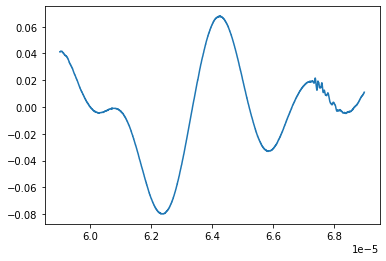

In [24]:
plt.plot(time, vol)
plt.xlabel(")
plt.show()